In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [251]:
#Generate binary message as random array of length N
N = 100000
m = np.random.randint(2,size=N)
print(sum(m))

#BPSK mostulation
x = np.ones(len(m),dtype=int)
for i in range(len(m)):
    if m[i] < 1:
        x[i] = -1

#Simulate AWGN channel
mu, sigma = 0, 1
z = np.random.normal(mu,sigma)
y = z+x

#HD decoder
m_h = np.zeros(len(y))
for i in range(len(y)):
    if y[i] < 0:
        m_h[i] = 0
    else:
        m_h[i] = 1

err = 1.0*(m != m_h).sum()/N


49877
0.49877


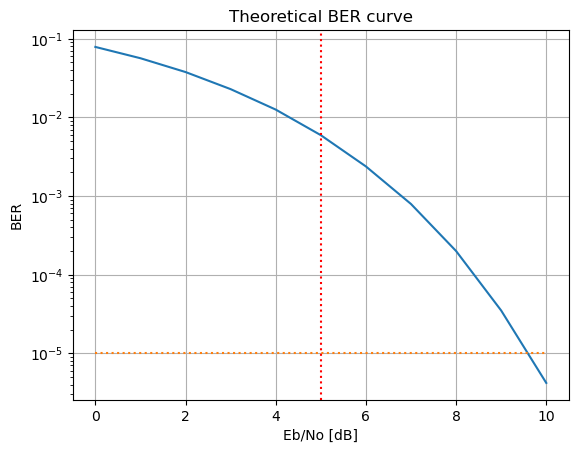

In [277]:
#Generate Eb/No in dB and set constants
db_m = 11
p = 1   #For uncoded BPSK the power and rate are both 1
R = 1
N = 5000000
EbNo_range = range(0,db_m)
BER = [None]*db_m
err_goal = 10**(-5)*np.ones(db_m)
for i in range(0, db_m):

    EbNodB = EbNo_range[i]
    EbNo = 10.0**(EbNodB/10.0)
    x = 2*(np.random.rand(N) >= 0.5) -1
    noise_stdev = np.sqrt(p/(2*R*EbNo))
    y = x + noise_stdev*np.random.randn(N)
    y_d = 2*(y >= 0) - 1    #decoding y
    err = (x != y_d).sum()
    BER[i] = 1.0*err/N

plt.figure()
plt.semilogy(EbNo_range, BER,'-', EbNo_range, err_goal,':')
plt.axvline(x=5,color='red',linestyle=':')
plt.xlabel('Eb/No [dB]')
plt.ylabel('BER')
plt.title('Theoretical BER curve')
plt.grid(True)
